In [1]:
%pip install -q gradio
%pip install -q catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set_theme()

In [4]:
df = sns.load_dataset("titanic")

In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [8]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='pclass', ylabel='count'>

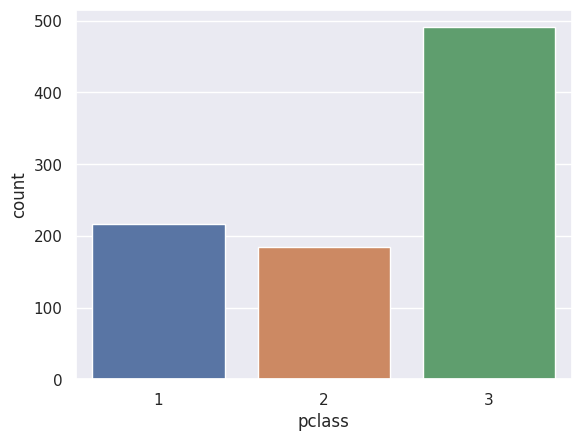

In [9]:
sns.countplot(x = "pclass", data = df)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='embarked', ylabel='count'>

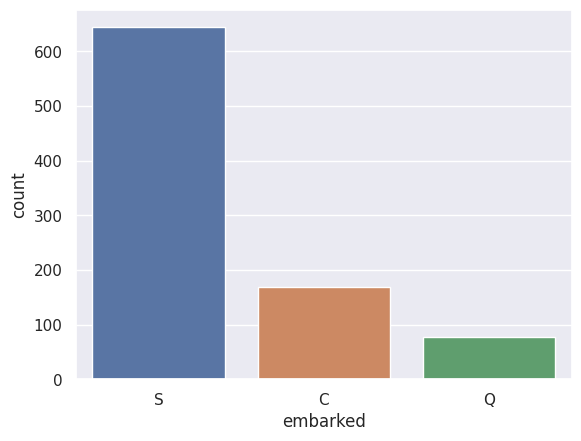

In [10]:
sns.countplot(x = "embarked", data = df)

In [11]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [13]:
# Identifying features, we are keeping very few features as we want to simulate this using gradio
features = [ 'pclass', 'sex', 'age', 'fare',
       'embarked']
target = 'survived'

In [15]:
df[features].isna().sum()

pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [16]:
# Filling missing values
df['age'].fillna(np.nanquantile(df['age'], 0.5), inplace = True)
df['embarked'].fillna("S", inplace = True)

In [17]:
from catboost import CatBoostClassifier

In [20]:
clf = CatBoostClassifier()

In [21]:
# Creating features and target
X = df[features]
y = df[target]

In [22]:
clf.fit(X,y, cat_features=['pclass', 'sex', 'embarked'])

Learning rate set to 0.009807
0:	learn: 0.6861079	total: 49.3ms	remaining: 49.3s
1:	learn: 0.6807116	total: 50.8ms	remaining: 25.4s
2:	learn: 0.6752663	total: 52.5ms	remaining: 17.5s
3:	learn: 0.6712222	total: 53.9ms	remaining: 13.4s
4:	learn: 0.6661659	total: 55.2ms	remaining: 11s
5:	learn: 0.6609001	total: 56.7ms	remaining: 9.4s
6:	learn: 0.6547619	total: 58.8ms	remaining: 8.35s
7:	learn: 0.6488790	total: 60.9ms	remaining: 7.55s
8:	learn: 0.6436617	total: 62.4ms	remaining: 6.87s
9:	learn: 0.6391954	total: 63.8ms	remaining: 6.32s
10:	learn: 0.6348349	total: 65.7ms	remaining: 5.9s
11:	learn: 0.6295209	total: 68ms	remaining: 5.6s
12:	learn: 0.6252814	total: 69.7ms	remaining: 5.29s
13:	learn: 0.6206696	total: 71.7ms	remaining: 5.05s
14:	learn: 0.6153431	total: 73.7ms	remaining: 4.84s
15:	learn: 0.6111353	total: 75.4ms	remaining: 4.64s
16:	learn: 0.6063322	total: 77.4ms	remaining: 4.47s
17:	learn: 0.6013640	total: 79.4ms	remaining: 4.33s
18:	learn: 0.5979046	total: 80.9ms	remaining: 4.18s

In [24]:
clf.save_model('model.bin')